<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U29T1CreditAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
ANALISIS DE CREDITO  - CLASE 58 (ANALISIS DE DATO EXPLORATORIO (EDA))
  https://www.kaggle.com/competitions/home-credit-default-risk

  QUE ES LA INFORMACION CREDITICIA?
    Mediante la competencia Home Credit Default Risk de Kaggle, los estudiantes aprenderán cómo aplicar y analizar modelos a los desafíos que enfrentan las empresas reales, lo que brinda una excelente oportunidad para que los estudiantes aprendan cómo usar los datos para respaldar las decisiones comerciales.

RESUMEN
Pudimos analizar datos reales utilizando conjuntos de datos de Kaggle.
Aprendí a visualizar y explorar datos usando bibliotecas de Python.
Pude establecer mis propios objetivos y formular hipótesis basadas en datos.
'''

In [ ]:
'''
PROBLEMA 1 - COMPRESION DEL CONTENIDO DE LA COMPETENCIA
  Primero, lee la página Overview de la competencia para entender cuál es el objetivo de "Home Credit Default Risk". Esta competencia debe investigarse desde los siguientes puntos de vista:

  ¿Qué tipo de empresa es Home Credit?
  Es una empresa que ofrece financiamiento al consumidor, y requiere predicciones precisas para evaluar la solvencia de sus clientes.

  ¿Qué se debe predecir en esta competencia?
  Se debe predecir si un cliente caerá en incumplimiento de pago (morosidad) en el futuro.

  ¿Qué beneficios obtiene la empresa con esto?
  Las predicciones precisas mejoran la gestión del riesgo y ayudan a reducir los préstamos incobrables.

  PREPARACION DEL CONJUNTO DE DATOS
    El conjunto de datos se obtiene desde la página de la competencia en Kaggle.
    En concreto, se debe descargar el archivo application_train.csv, que se utilizará para el análisis.

    Además, en la misma página se encuentra el archivo HomeCredit_columns_description.csv, el cual contiene detalles sobre cada una de las variables del conjunto de datos.

    Comparar ambos archivos permite una mejor comprensión de los datos.

  SOBRE LOS NOTEBOOKS
    En la página de Notebooks de la competencia, puedes consultar los notebooks publicados por otros participantes como referencia.
    En particular, los siguientes notebooks son recomendados para principiantes:
      https://www.kaggle.com/code/gpreda/home-credit-default-risk-extensive-eda
      https://www.kaggle.com/code/shivamb/homecreditrisk-extensive-eda-baseline-0-772
      https://www.kaggle.com/code/osciiart/homecreditrisk-extensive-eda-baseline-model-jp
    Estos notebooks incluyen un análisis exploratorio de datos (EDA) muy completo, por lo que puedes aprender métodos útiles que te servirán en tu propio análisis.

'''
import pandas as pd

# Load the data
data = pd.read_csv('application_train.csv')

print(data.shape)


(307511, 122)


First rows of dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...        

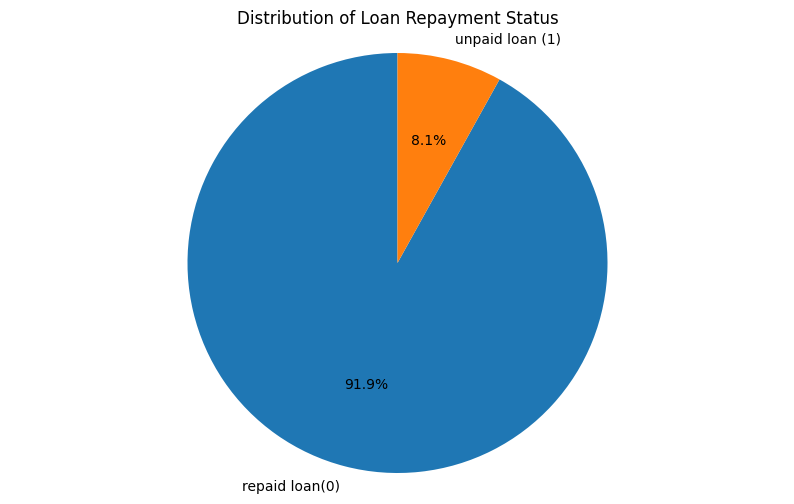

In [16]:
'''
PROBLEMA 2 - OBTENER UNA DESCRIPCION GENERAL DE LOS DATOS
  Para entender las principales características del conjunto de datos, se emplean los siguientes métodos:

    Usar head() para visualizar las primeras filas del conjunto de datos.
    Utilizar .info() para conocer los tipos de datos y el resumen de los valores faltantes.
    Aplicar .describe() para obtener las propiedades estadísticas del conjunto.
    Estos métodos permiten tener una idea clara sobre la cantidad de valores faltantes y qué variables merecen atención especial.

    Cabe destacar que en entornos profesionales, la limpieza de datos es fundamental, y se debe tener especial cuidado con las variables que contienen muchos valores faltantes. Por ejemplo, una práctica común es rellenar los valores faltantes utilizando la mediana excluyendo los valores atípicos.
'''
import pandas as pd

data = pd.read_csv('application_train.csv')

print("First rows of dataset:")
print(data.head())
print("\n Datatypes and overview of missing values:")
print(data.info())
print("\n Summary statistics:")
print(data.describe())
print(f"Dataset uncleaned with {data.shape[0]} rows and {data.shape[1]} columns")

# Drop columns that have 5 or more missing values
data_cleaned = data.dropna(axis=1, thresh=len(data) - 4)
print(f"Dataset cleaned with {data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns")

# Count missing values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending = False)

missing_data_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_df)

# Count instances of each class
target_counts = data['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(target_counts,
        labels = ['repaid loan(0)', 'unpaid loan (1)'],
        autopct = '%1.1f%%',
        startangle = 90)
plt.title('Distribution of Loan Repayment Status')
plt.axis('equal')
plt.show()

In [14]:
'''
PROBLEMA 3 - ASIGNACION
  Después de obtener una visión general de los datos, intenta formular tus propias preguntas o hipótesis como las siguientes:

    ¿Cómo influyen ciertos atributos en la evaluación crediticia?
    ¿Qué impacto tiene el otorgamiento de crédito con alta tasa de interés en el riesgo?
    ¿Afectan los niveles de ingresos al impago de préstamos?
    ¿Se relaciona el importe del préstamo o del crédito con la probabilidad de impago?
    ¿Son ciertas ocupaciones o tipos de empleo más riesgosos que otros?
    ¿Influye la edad en la probabilidad de impago?
    ¿Está la situación familiar (por ejemplo, número de hijos o estado civil) relacionada con las tasas de impago?

  En entornos empresariales reales, las respuestas a estas problemáticas suelen servir como base para diseñar nuevas estrategias de negocio o mejorar procesos existentes.
'''

Dataset uncleaned with 307511 rows and 122 columns
Dataset cleaned with 307511 rows and 57 columns


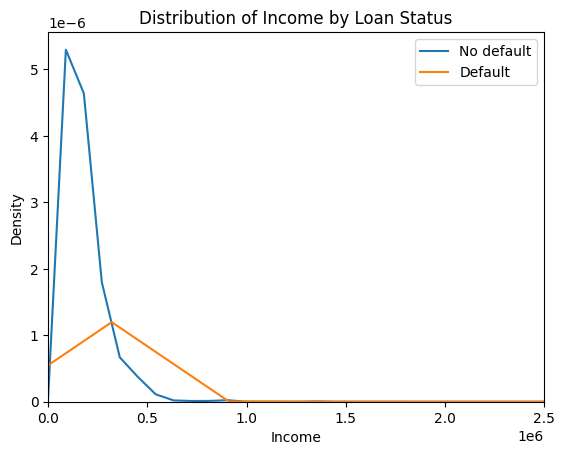

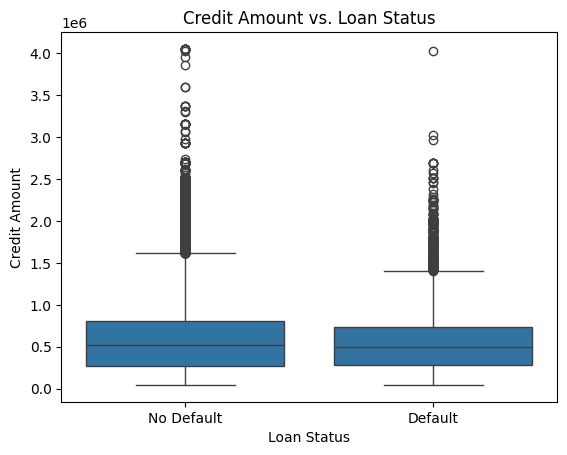

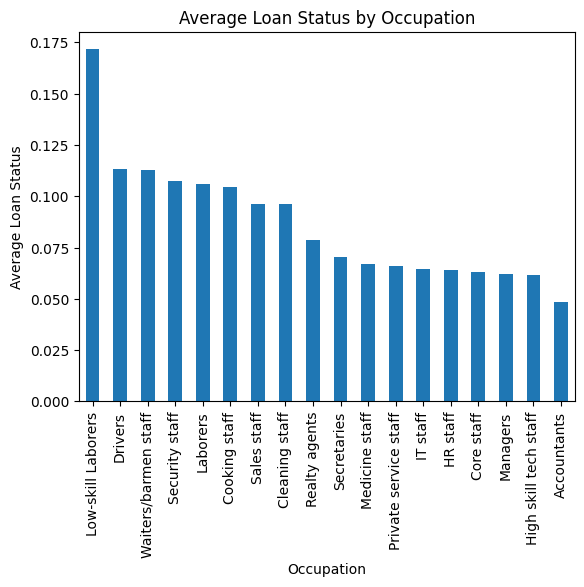

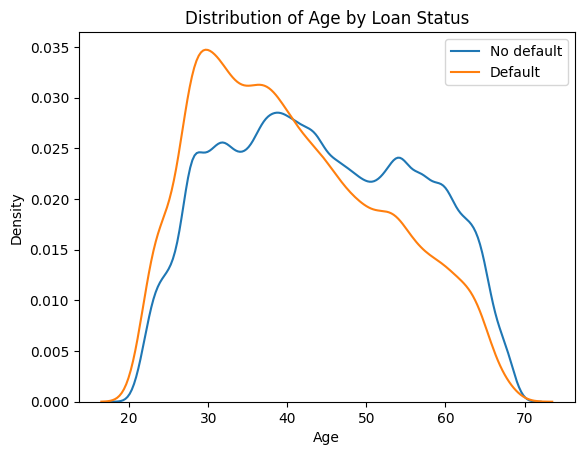

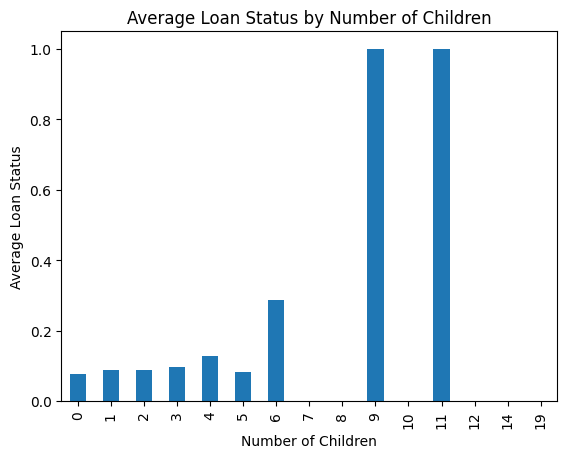

In [25]:
'''
PROBLEMA 4 - EXPLORACION DE DATOS
  Para resolver las preguntas planteadas, se procede con la exploración de los datos.
  Por ejemplo, se puede utilizar librerías de visualización para aplicar los siguientes métodos:
    - Gráfico circular que muestre la proporción de clases.
    - Mapa de calor (heatmap) que indique la correlación entre atributos.
    - Histogramas de atributos destacados.
  Los conocimientos que se obtienen a través de esta exploración son directamente aplicables al diseño de modelos de aprendizaje automático más avanzados.
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('application_train.csv')

# ¿Afectan los niveles de ingresos al impago de préstamos?
sns.kdeplot(data=data[data['TARGET'] == 0], x = 'AMT_INCOME_TOTAL', label = 'No default')
sns.kdeplot(data=data[data['TARGET'] == 1], x = 'AMT_INCOME_TOTAL', label = 'Default')
plt.title('Distribution of Income by Loan Status')
plt.xlabel('Income')
plt.xlim(0, 0.025e8)
plt.ylabel('Density')
plt.legend()
plt.show()

# ¿Se relaciona el importe del préstamo o del crédito con la probabilidad de impago?
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data)
plt.title('Credit Amount vs. Loan Status')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.xlabel('Loan Status')
plt.ylabel('Credit Amount')
plt.show()

# ¿Son ciertas ocupaciones o tipos de empleo más riesgosos que otros?
occ_df = data[['OCCUPATION_TYPE', 'TARGET']].groupby('OCCUPATION_TYPE').mean().sort_values('TARGET', ascending = False)
occ_df.plot(kind = 'bar', legend = False)
plt.title('Average Loan Status by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation = 90)
plt.ylabel('Average Loan Status')
plt.show()

# ¿Influye la edad en la probabilidad de impago?
data['AGE_YEARS'] = data['DAYS_BIRTH'] / -365

sns.kdeplot(data = data[data['TARGET'] == 0], x= 'AGE_YEARS', label = 'No default')
sns.kdeplot(data = data[data['TARGET'] == 1], x= 'AGE_YEARS', label = 'Default')
plt.title('Distribution of Age by Loan Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# ¿Está la situación familiar (por ejemplo, número de hijos o estado civil) relacionada con las tasas de impago?
child_df = data.groupby('CNT_CHILDREN')['TARGET'].mean()

child_df.plot(kind = 'bar', legend = False)
plt.title('Average Loan Status by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Loan Status')
plt.show()


In [ ]:
'''
PROBLEMA 5 - PUBLICAR EN NOTEBOOKS (ASIGNACION AVANZADA)
  También se recomienda publicar los resultados de este trabajo en los Notebooks de la competencia.
  Al hacerlo, puedes recibir comentarios de otros científicos de datos, lo que te permitirá mejorar tus habilidades de análisis.
'''